In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df_time_series = pd.read_csv(r"C:\Users\hp pavilion\Downloads\alien_sightings (1).csv")
df_time_series.head(5)

C:\Users\hp pavilion\AppData\Local\Temp\ipykernel_45984\4063207391.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_time_series = pd.read_csv(r"C:\Users\hp pavilion\Downloads\alien_sightings (1).csv")


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [53]:
df_time_series.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [54]:
df_time_series['datetime'] = pd.to_datetime(df_time_series['datetime'])
df_time_series['duration (seconds)'] = df_time_series['duration (seconds)'].str.replace('`','') #so cleaning on the duration column that has a backtick character on a few rows
df_time_series['duration (seconds)'] = pd.to_numeric(df_time_series['duration (seconds)'])

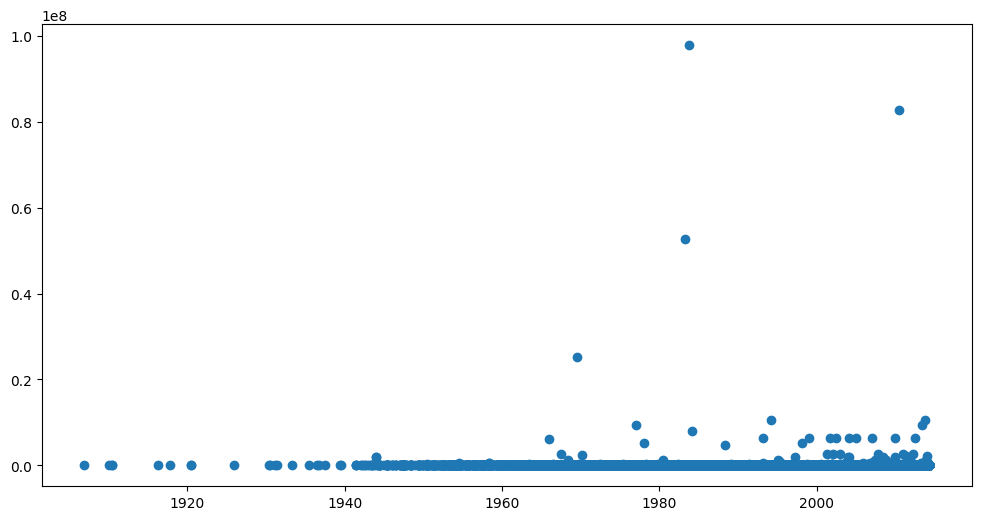

In [55]:
plt.figure(figsize=(12,6))
plt.scatter(df_time_series['datetime'], df_time_series['duration (seconds)'])
plt.show()



In [56]:
df_time_series.set_index('datetime', inplace = True)


In [58]:
df_time_series.head(5)


,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [88]:
df_time_monthly = df_time_series.resample('M').count()
df_time_monthly


C:\Users\hp pavilion\AppData\Local\Temp\ipykernel_45984\2283744670.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_monthly = df_time_series.resample('M').count()


,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
1906-11-30,1,0,0,1,1,1,1,1,1,1
1906-12-31,0,0,0,0,0,0,0,0,0,0
1907-01-31,0,0,0,0,0,0,0,0,0,0
1907-02-28,0,0,0,0,0,0,0,0,0,0
1907-03-31,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2014-01-31,696,664,623,678,696,679,696,696,696,696
2014-02-28,528,506,472,518,528,509,528,528,528,528
2014-03-31,496,456,442,487,496,480,496,496,496,496


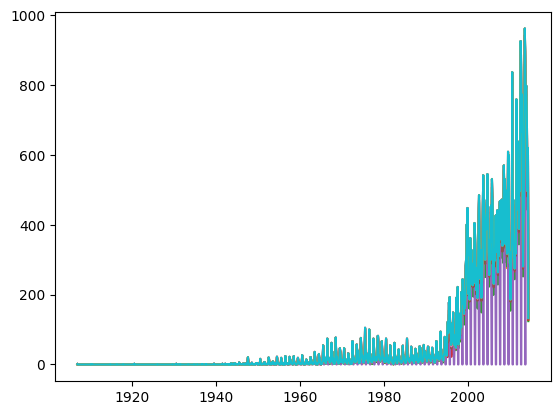

In [89]:
plt.plot(df_time_monthly.index, df_time_monthly)
plt.show()


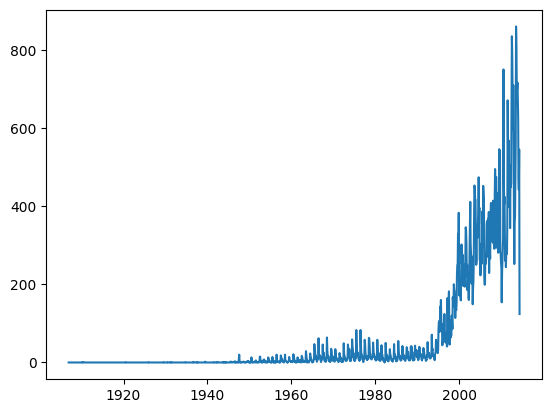

In [90]:
plt.plot(df_time_monthly.index, df_time_monthly['country'])
plt.show()


C:\Users\hp pavilion\AppData\Local\Temp\ipykernel_45984\4210681096.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time_yearly = df_time_series.resample('Y').count()


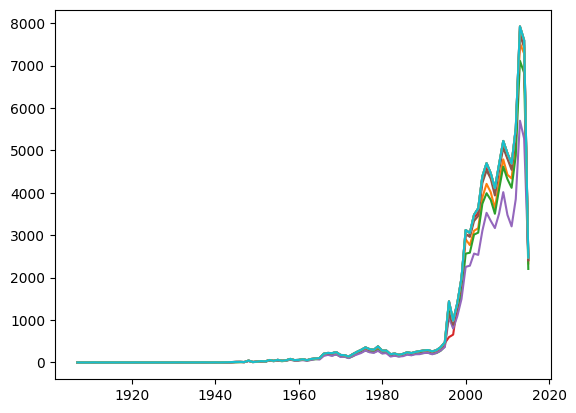

In [91]:
df_time_yearly = df_time_series.resample('Y').count()
plt.plot(df_time_yearly.index, df_time_yearly)


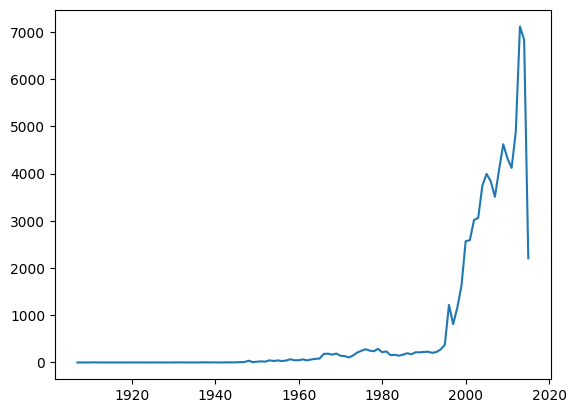

In [92]:
plt.plot(df_time_yearly.index, df_time_yearly['country'])


In [109]:
df_time_country = df_time_series.groupby('country').resample('M').size().unstack(level = 0).dropna()

C:\Users\hp pavilion\AppData\Local\Temp\ipykernel_45984\3054625185.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_country = df_time_series.groupby('country').resample('M').size().unstack(level = 0).dropna()


<Axes: xlabel='datetime'>

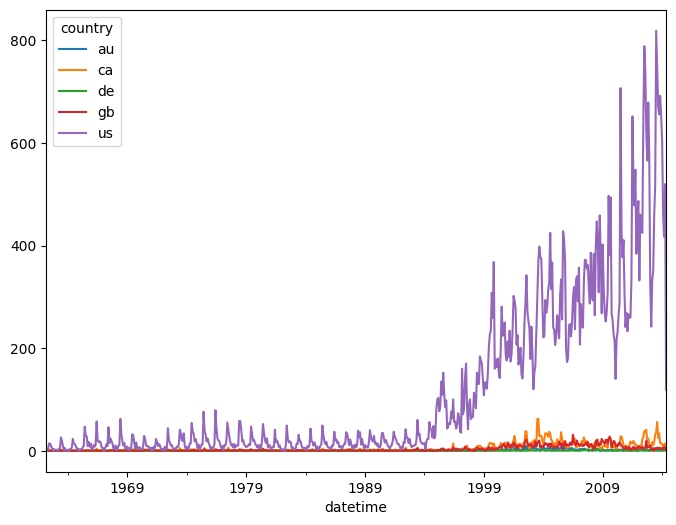

In [113]:
df_time_country.plot(figsize=(8,6))